In [1]:
import h5py
import psana
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import  rotate
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit,minimize
import multiprocessing
import os
from functools import partial
import time
import sys
import argparse
from datetime import datetime
import tempfile
import XSpect.XSpect_Analysis
import XSpect.XSpect_Controller
import XSpect.XSpect_Visualization


<font size=5>XAS Analysis and Visualization Test</font>

In [2]:
start=time.time()
xas_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(lcls_run=21, hutch='xcs', experiment_id='xcsl1004021')

In [3]:
start=time.time()
xas_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(lcls_run=21, hutch='xcs', experiment_id='xcsl1004021')
xas=XSpect.XSpect_Controller.XASBatchAnalysis()
keys=['epics/ccm_E','tt/ttCorr','epics/lxt_ttc', 'enc/lasDelay' , 'ipm4/sum','tt/AMPL','epix_1/ROI_0_sum'] 
names=['ccm','time_tool_correction','lxt_ttc'  ,'encoder','ipm4', 'time_tool_ampl','epix']
xas.set_key_aliases(keys,names)
xas.add_filter('xray','ipm4',500.0)
xas.add_filter('simultaneous','ipm4',500.0)
xas.add_filter('simultaneous','time_tool_ampl',0.01)
xas.run_parser(['298-301 307-319'])
xas.primary_analysis_parallel_loop(4,xas_experiment)
#xas.primary_analysis_loop(xas_experiment)
end=time.time()

/cds/home/l/lbgee/X1004021/p238/XSpect/XSpect_Visualization.py:108: RuntimeWarning: invalid value encountered in divide
  laser_on_spectrum=xas_analysis.summed_laser_on/xas_analysis.summed_norm_on
/cds/home/l/lbgee/X1004021/p238/XSpect/XSpect_Visualization.py:109: RuntimeWarning: invalid value encountered in divide
  laser_off_spectrum=np.divide(np.nansum(xas_analysis.summed_laser_off,axis=0),np.nansum(xas_analysis.summed_norm_off,axis=0))


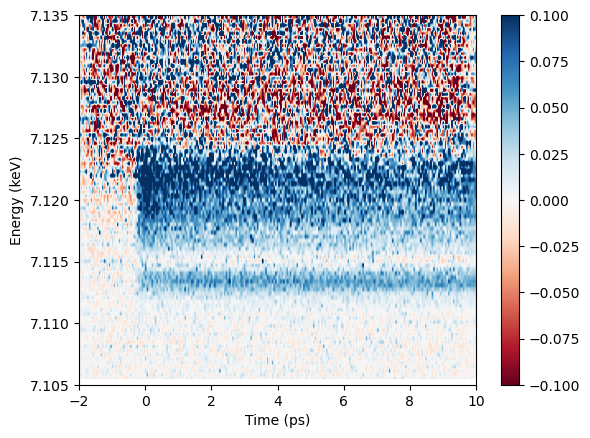

In [4]:
v=XSpect.XSpect_Visualization.XASVisualization()
v.combine_spectra(xas_analysis=xas,
                  xas_laser_key='epix_simultaneous_laser_time_energy_binned',
                  xas_key='epix_xray_not_laser_time_energy_binned',
                  norm_laser_key='ipm4_simultaneous_laser_time_energy_binned',
                  norm_key='ipm4_xray_not_laser_time_energy_binned')
v.plot_2d_difference_spectrum(xas)

<font size=5>XES Analysis and Visualization Test</font>

In [10]:
xes_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(hutch='xcs',experiment_id='xcsc00121',lcls_run=21)
xes=XSpect.XSpect_Controller.XESBatchAnalysis()
xes.mintime=-1
xes.maxtime=1
xes.numpoints=40
xes.set_key_aliases()
xes.rois=[[35,65],[120,150]]
#xes.add_filter('xray','ipm4',1.0E3)
#xes.add_filter('simultaneous','ipm4',1.0E3)
#xes.add_filter('simultaneous','time_tool_ampl',0.15)
xes.run_parser(['216'])

In [11]:
start=time.time()
xes.primary_analysis_parallel_loop(4,xes_experiment)
#xes_analysis.primary_analysis_loop(test)
end=time.time()

In [12]:
print(end-start)

112.13634634017944


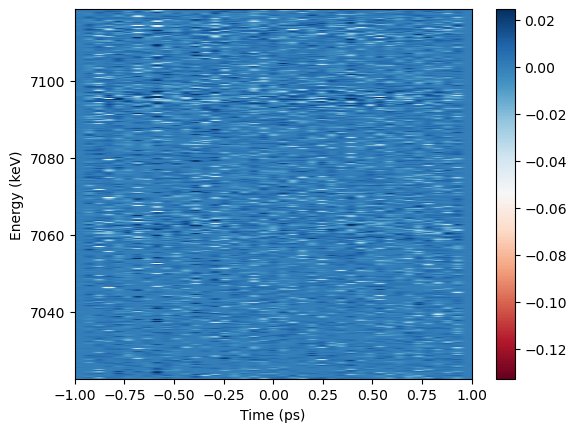

In [13]:
v=XSpect.XSpect_Visualization.XESVisualization()
v.combine_spectra(xes_analysis=xes,xes_key='epix_ROI_1_xray_not_laser_time_binned',xes_laser_key='epix_ROI_1_simultaneous_laser_time_binned')
v.plot_2d_difference_spectrum(xes)

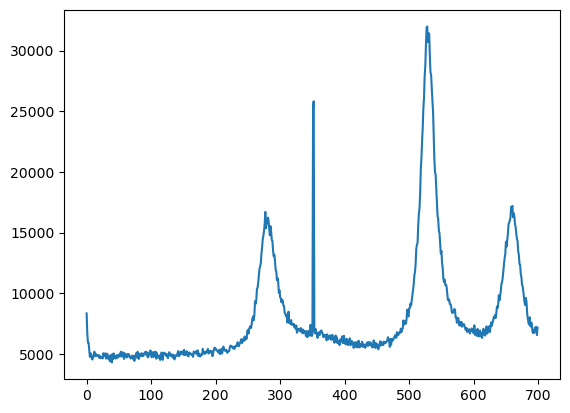

In [14]:
plt.plot(np.sum(xes.analyzed_runs[0].epix_ROI_1,axis=0))

In [2]:
xas_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(lcls_run=21, hutch='xcs', experiment_id='xcsc00121')
xas=XSpect.XSpect_Controller.XASBatchAnalysis()
keys=['epics/ccm_E','tt/ttCorr','epics/lxt_ttc', 'enc/lasDelay' , 'ipm4/sum','tt/AMPL','epix_2/ROI_0_sum'] 
names=['ccm','time_tool_correction','lxt_ttc'  ,'encoder','ipm4', 'time_tool_ampl','epix']
xas.mintime=-0.1
xas.maxtime=1.1
xas.numpoints=24
xas.minccm=7.109
xas.maxccm=7.140
xas.numpoints_ccm=45
xas.set_key_aliases(keys,names)
xas.add_filter('xray','ipm4',500.0)
xas.add_filter('simultaneous','ipm4',500.0)
xas.add_filter('simultaneous','time_tool_ampl',0.01)
xas.run_parser([' 128 131-132 134-137 144-147 '])
xas.primary_analysis_parallel_loop(4,xas_experiment)
#xas.primary_analysis_loop(xas_experiment)
end=time.time()

In [8]:
import pickle

In [7]:
plt.plot(xas.analyzed_runs[0].ccm

array([0.53143576, 0.53824048, 0.54477836, ..., 0.36158446, 0.36825576,
       0.37492706])

In [11]:
filehandler = open('test.pkl', 'w') 
pickle.dump(xas,filehandler)

TypeError: write() argument must be str, not bytes

/sdf/home/l/lbgee/xspect/XSpect/XSpect_Visualization.py:108: RuntimeWarning: invalid value encountered in true_divide
  laser_on_spectrum=xas_analysis.summed_laser_on/xas_analysis.summed_norm_on


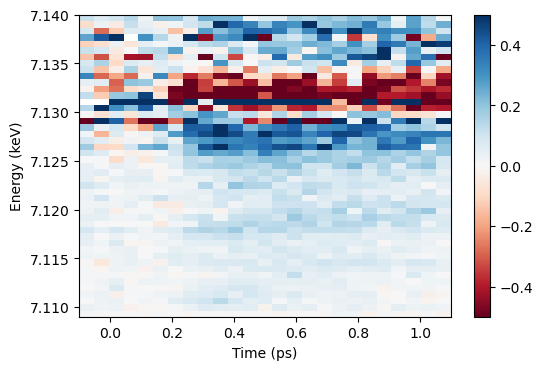

In [3]:
v=XSpect.XSpect_Visualization.XASVisualization()
v.combine_spectra(xas_analysis=xas,
                  xas_laser_key='epix_simultaneous_laser_time_energy_binned',
                  xas_key='epix_xray_not_laser_time_energy_binned',
                  norm_laser_key='ipm4_simultaneous_laser_time_energy_binned',
                  norm_key='ipm4_xray_not_laser_time_energy_binned')
v.plot_2d_difference_spectrum(xas)

In [4]:
os.listdir(r'/sdf/data/lcls/ds/xcs/xcsc00121/hdf5')

['smalldata']

In [5]:
for i in xas.analyzed_runs:
    print(f'Run: {i.run_number}')
    print(i.ipm4_simultaneous_laser_time_energy_binned.shape)

Run: 128
(25, 47)
Run: 131
(25, 47)
Run: 132
(25, 47)
Run: 134
(25, 47)
Run: 135
(25, 47)
Run: 136
(25, 47)
Run: 137
(25, 47)
Run: 144
(25, 47)
Run: 145
(25, 47)
Run: 146
(25, 47)
Run: 147
(25, 47)


In [35]:
xas.analyzed_runs[0].status

['New',
 'Obtained shot properties',
 'HDF5 import of keys completed. Time: 0.01 seconds',
 'Mask: xray has been filtered on ipm4 by minimum threshold: 500.000\nShots removed: 7972',
 'Mask: simultaneous has been filtered on ipm4 by minimum threshold: 500.000\nShots removed: 5688',
 'Mask: simultaneous has been filtered on time_tool_ampl by minimum threshold: 0.010\nShots removed: 2822',
 'Shots combined for detector epix on filters: simultaneous and laser into epix_simultaneous_laser',
 'Shots (11471) separated for detector epix on filters: xray and laser into epix_xray_laser',
 'Shots combined for detector ipm4 on filters: simultaneous and laser into ipm4_simultaneous_laser',
 'Shots (11471) separated for detector ipm4 on filters: xray and laser into ipm4_xray_laser',
 'Shots combined for detector ccm on filters: simultaneous and laser into ccm_simultaneous_laser',
 'Shots (11471) separated for detector ccm on filters: xray and laser into ccm_xray_laser',
 'Generated timing bins from

In [38]:
xas.analyzed_runs[3].status

['New',
 'Obtained shot properties',
 'HDF5 import of keys completed. Time: 0.00 seconds',
 'Mask: xray has been filtered on ipm4 by minimum threshold: 500.000\nShots removed: 189',
 'Mask: simultaneous has been filtered on ipm4 by minimum threshold: 500.000\nShots removed: 139',
 'Mask: simultaneous has been filtered on time_tool_ampl by minimum threshold: 0.010\nShots removed: 61',
 'Shots combined for detector epix on filters: simultaneous and laser into epix_simultaneous_laser',
 'Shots (221) separated for detector epix on filters: xray and laser into epix_xray_laser',
 'Shots combined for detector ipm4 on filters: simultaneous and laser into ipm4_simultaneous_laser',
 'Shots (221) separated for detector ipm4 on filters: xray and laser into ipm4_xray_laser',
 'Shots combined for detector ccm on filters: simultaneous and laser into ccm_simultaneous_laser',
 'Shots (221) separated for detector ccm on filters: xray and laser into ccm_xray_laser',
 'Generated timing bins from -0.100000

In [45]:
xas.analyzed_runs[3].ipm4_xray_not_laser_time_energy_binned

(476,)

In [47]:
xas.analyzed_runs[3].ipm4_simultaneous_laser_time_energy_binned.shape


(25, 36)

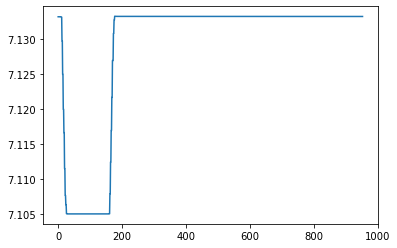

In [51]:
plt.plot(xas.analyzed_runs[0].ccm)